In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [33]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [7]:
fashion_data = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [14]:
#spliting

(x_train,y_train),(x_test,y_test)=fashion_data

In [15]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
#fashion item label
items_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneakers","Bag","Ankle Boot"]

In [11]:
items_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneakers',
 'Bag',
 'Ankle Boot']

In [12]:
#Reshaping Data
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [16]:
# Normalizing data
x_train_norm = x_train/255
x_test_norm = x_test/255

In [17]:
# spliting for training and testing and validation
x_validate,x_train = x_train_norm[:5000],x_train_norm[5000:]
y_validate,y_train = y_train[:5000],y_train[5000:]
x_testt = x_train_norm

In [25]:
# Random Seed
tf.random.set_seed(42)

# Model Architecture
model = keras.models.Sequential()

# Building Model
model.add(keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) , strides = 1 , padding = 'valid' , activation = 'relu' , input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(300 , activation = 'relu'))
model.add(keras.layers.Dense(100 , activation = 'relu'))
model.add(keras.layers.Dense(10 , activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_15 (Dense)            (None, 300)               1622700   
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                      

Epoch 1/10
860/860 [==============================] - 5s 5ms/step - loss: 0.2516 - accuracy: 0.9079 - val_loss: 0.3088 - val_accuracy: 0.8862
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.2463 - accuracy: 0.9100 - val_loss: 0.2879 - val_accuracy: 0.8968
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.2421 - accuracy: 0.9105 - val_loss: 0.4525 - val_accuracy: 0.8406
Epoch 4/10
860/860 [==============================] - 3s 4ms/step - loss: 0.2370 - accuracy: 0.9131 - val_loss: 0.2900 - val_accuracy: 0.8962
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.2346 - accuracy: 0.9141 - val_loss: 0.2692 - val_accuracy: 0.9028
Epoch 6/10
860/860 [==============================] - 4s 4ms/step - loss: 0.2284 - accuracy: 0.9169 - val_loss: 0.2668 - val_accuracy: 0.9052
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.2242 - accuracy: 0.9187 - val_loss: 0.2918 - val_accuracy: 0.9000
Epoch 

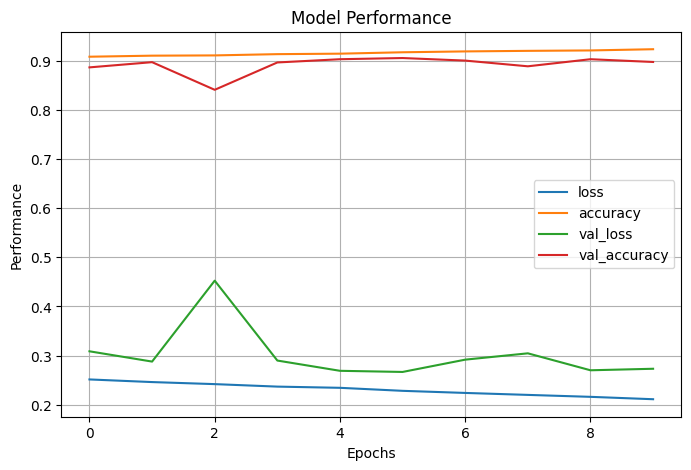

In [36]:
# Compiling the model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = 'sgd', metrics = ["accuracy"] )

# Fitting Values to Model
model_fit = model.fit(x_train ,y_train ,epochs=10 ,batch_size=64 , validation_data=(x_validate, y_validate))

# Model Performance Visualization
pd.DataFrame(model_fit.history).plot(figsize = (8, 5))
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.grid(True)
plt.show()

313/313 [==============================] - 2s 4ms/step - loss: 47.6033 - accuracy: 0.8608
Model Evoluation Score :  [47.60326385498047, 0.86080002784729]
313/313 [==============================] - 1s 2ms/step
y_predict output :  [9 2 1 ... 8 1 5]
Predicted Class :  [9 2 1]
Predicted Class Labels :  ['Ankle Boot' 'Pullover' 'Trouser']


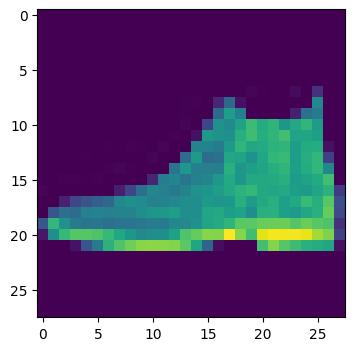

Confusion Matrix : 
 [[794  11  31  19  33   1 106   0   5   0]
 [  0 991   0   2   4   0   2   0   1   0]
 [ 12   1 721   6 193   1  66   0   0   0]
 [  5  72   8 771 117   0  25   0   2   0]
 [  1   1  30   7 937   0  23   0   1   0]
 [  0   0   0   1   0 992   0   0   1   6]
 [100   2  63  11 165   0 652   0   7   0]
 [  0   0   0   0   0 145   0 812   1  42]
 [  3   1   3   5   9   4   2   2 971   0]
 [  0   0   0   0   0  14   1  18   0 967]]
Accuracy Score :  0.8608


In [40]:
# Model Evoluation
score = model.evaluate(x_test, y_test)
print("Model Evoluation Score : ",score)

# Prediction & Class Output
y_pred = np.argmax(model.predict(x_test),axis=-1)
print("y_predict output : ",y_pred)

# class & labels of initial 3 data
print('Predicted Class : ',y_pred[:3])
print('Predicted Class Labels : ', np.array(items_names) [y_pred[:3]])

# Predicted Output Visalization
plt.figure(figsize=(6, 4))
plt.imshow(x_test[0].reshape((28,28)))
plt.show()

# Performance Metrics
# Confusion Matrix
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

# Accuracy Score
print("Accuracy Score : ",accuracy_score(y_test, y_pred))